# Classic Regressions

### Table of content
1. Load datas <br>
2. Linear regression <br>
3. Ridge Regression <br>
4. Lasso Regression <br>
5. SVM <br>

## 0) Importation

In [1]:
from sklearn import svm
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1) Load datas

In [2]:
path="./data/rwanda"
file = pd.read_csv(path)

In [3]:
file.head()

,Unnamed: 0,cluster,latitude,longitude,wealth_index,mean_light,median_light,std_light,min_light,max_light
0,0,1,-2.532818,29.684726,-0.531405,0.06,0.0,0.596992,0.0,6.0
1,1,2,-1.833858,30.310689,-0.409830,0.00,0.0,0.000000,0.0,0.0
2,2,3,-1.888155,29.478298,-0.478115,0.00,0.0,0.000000,0.0,0.0
3,3,4,-2.366763,30.521692,-0.435960,0.00,0.0,0.000000,0.0,0.0
4,4,5,-2.171266,30.018541,-0.449480,0.00,0.0,0.000000,0.0,0.0


We only take the means of the light and the wealth indexes in order to process the regressions. We also split the inputs into a training and a testing set. (60% training/40% testing)

In [4]:
X=np.resize(file["mean_light"],(492,1))
Y=np.resize(file["wealth_index"],(492,1))
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.4, random_state=0)

## 2) Linear Regression

In [5]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print(reg.coef_[0])
print(reg.intercept_)

[0.07000662]
[-0.34444866]


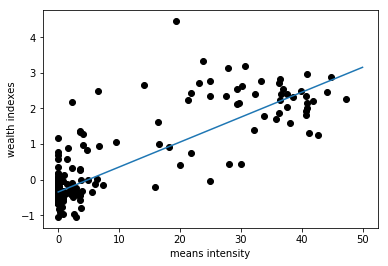

In [7]:
plt.figure(1)
x_line=np.linspace(0,50)
x_line=np.resize(x_line,(len(x_line),1))
y_line=reg.predict(x_line)
plt.scatter(X, Y,  color='black')
plt.plot(x_line,y_line)
plt.xlabel("means intensity")
plt.ylabel("wealth indexes")
plt.show()

In [8]:
reg.score(X_test,y_test)

0.7124118666450239

## 3) Ridge Regression

In [9]:
reg = linear_model.Ridge(alpha=50)
reg.fit(X_train,y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
print(reg.coef_)
print(reg.intercept_)

[[0.06989586]]
[-0.34403716]


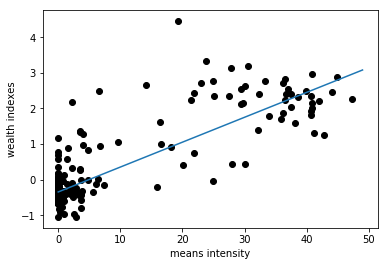

In [11]:
plt.figure(1)
x_line=np.linspace(0,49)
x_line=np.resize(x_line,(len(x_line),1))
y_line=reg.predict(x_line)
plt.scatter(X, Y,  color='black')
plt.plot(x_line,y_line)
plt.xlabel("means intensity")
plt.ylabel("wealth indexes")
plt.show()

In [12]:
reg.score(X_test,y_test)

0.7122194741848591

## 4) Lasso regression

In [13]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

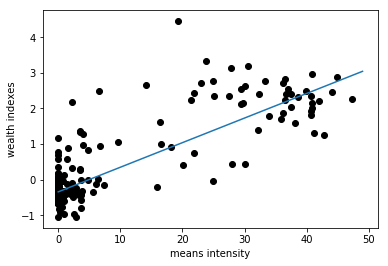

In [14]:
plt.figure(2)
x_line=np.linspace(0,49)
x_line=np.resize(x_line,(len(x_line),1))
y_line=reg.predict(x_line)
plt.scatter(X, Y,  color='black')
plt.plot(x_line,y_line)
plt.xlabel("means intensity")
plt.ylabel("wealth indexes")
plt.show()

In [15]:
reg.score(X_test,y_test)

0.7106947556951762

## 5) SVM